# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2)

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    def simpson_rule(a,b):
        c=(a+b)/2.0
        h=abs(b-a)/2.0
        return h*(f(a)+4.0*f(c)+f(b))/3.0

    dx=(xmax-xmin)/N
    x=numpy.linspace(xmin,xmax-dx,N)
    return numpy.sum(simpson_rule(x,x+dx))
    

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'a log-log plot showing the fractional error between these two results as the number of panels is varied')

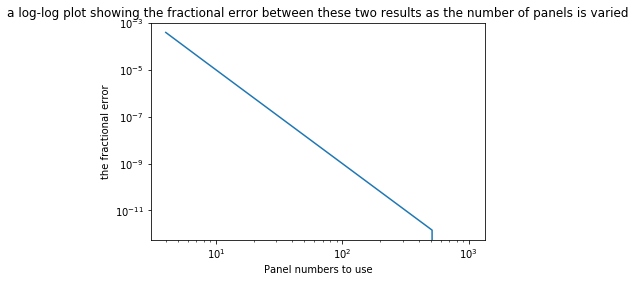

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts =numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024]) # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
A=numpy.zeros(9)
for n in range(0,8):
    A[n]=result_analytic-integrate_numeric(x0, x1, panel_counts[n])
import matplotlib.pyplot as plt
plt.loglog(panel_counts,A)
plt.xlabel('Panel numbers to use')
plt.ylabel('the fractional error')
plt.title('a log-log plot showing the fractional error between these two results as the number of panels is varied')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels will inprove the accuracy of the numerical method,if the number of panels is taken too large ,there will be memory error and the numerical integration will not work

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the number of panel will inprove the accuracy of the numerical method as well, but it is less accurate than by using
simpson rule for large number of panels because the error for trapezium is proportional to N^-2 but N^-4 fpr simpson rule